# Fleet data per country

### 24h average

In [ ]:
# Create a copy of merged_data
merged_data_copy = merged_data.copy()

# Compute daily average of Value for each Pollutant per Country
daily_avg_per_country = (
    merged_data_copy.groupby(['Country', 'Pollutant', 'Start'])['Value']
    .mean()
    .reset_index()
    .rename(columns={'Value': 'DailyAverageValue'})
)

daily_avg_per_country

,Country,Pollutant,Start,DailyAverageValue
0,AT,5,2013-01-01 00:00:00,319.393036
1,AT,5,2013-01-01 01:00:00,297.272252
2,AT,5,2013-01-01 02:00:00,158.900503
3,AT,5,2013-01-01 03:00:00,86.559707
4,AT,5,2013-01-01 04:00:00,59.949791
...,...,...,...,...
2209673,NO,6001,2023-12-31 19:00:00,3.906768
2209674,NO,6001,2023-12-31 20:00:00,4.139576
2209675,NO,6001,2023-12-31 21:00:00,3.564156
2209676,NO,6001,2023-12-31 22:00:00,2.909819


In [ ]:
#summary statistics of daily average values
daily_avg_per_country.describe()

,Pollutant,Start,DailyAverageValue
count,2.209678e+06,2209678,2.209678e+06
mean,9.384940e+02,2019-02-05 11:19:44.730623488,-1.413213e+03
min,5.000000e+00,2008-12-31 23:00:00,-1.167965e+09
25%,7.000000e+00,2016-08-27 19:15:00,6.201582e+00
50%,8.000000e+00,2019-04-30 23:00:00,1.658283e+01
75%,3.800000e+01,2021-08-30 11:00:00,3.630217e+01
max,6.001000e+03,2023-12-31 23:00:00,1.183894e+09
std,2.163275e+03,NaN,1.573824e+06


In [ ]:
# don't think we need to get rid of outliers necessarily
#getting rid of outliers
Q1 = daily_avg_per_country['DailyAverageValue'].quantile(0.25)
Q3 = daily_avg_per_country['DailyAverageValue'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

daily_avg_per_country = daily_avg_per_country[
    (daily_avg_per_country['DailyAverageValue'] >= lower_bound) &
    (daily_avg_per_country['DailyAverageValue'] <= upper_bound)
]

daily_avg_per_country

,Country,Pollutant,Start,DailyAverageValue
4,AT,5,2013-01-01 04:00:00,59.949791
5,AT,5,2013-01-01 05:00:00,52.924208
6,AT,5,2013-01-01 06:00:00,49.834083
7,AT,5,2013-01-01 07:00:00,49.908625
8,AT,5,2013-01-01 08:00:00,51.497500
...,...,...,...,...
2209673,NO,6001,2023-12-31 19:00:00,3.906768
2209674,NO,6001,2023-12-31 20:00:00,4.139576
2209675,NO,6001,2023-12-31 21:00:00,3.564156
2209676,NO,6001,2023-12-31 22:00:00,2.909819


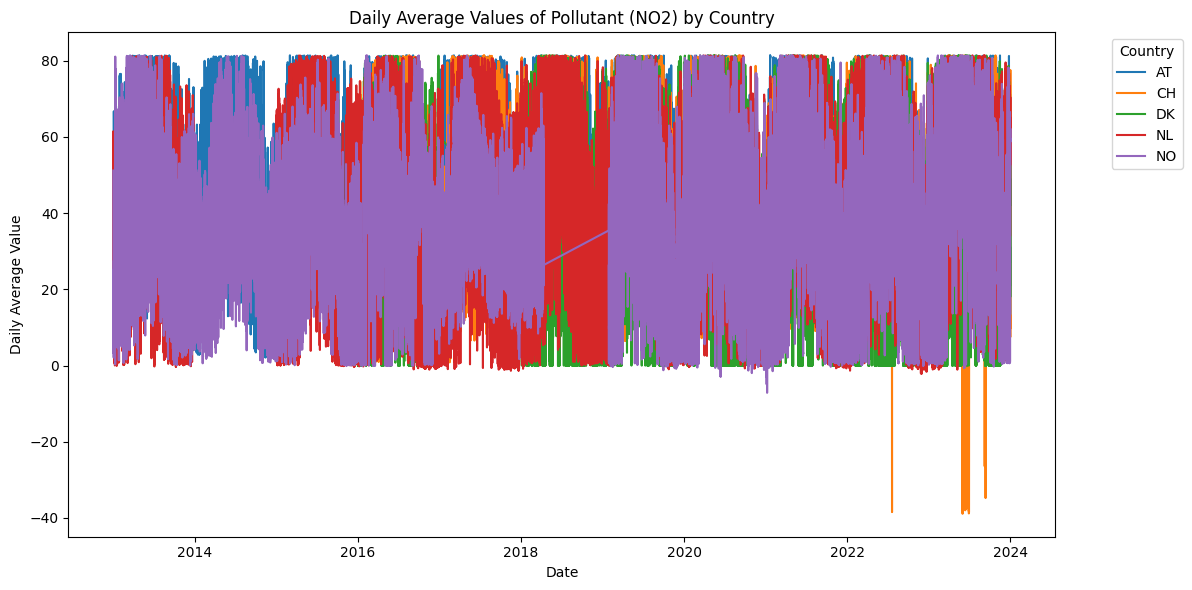

In [ ]:
import matplotlib.pyplot as plt

# Filter data for a specific pollutant (e.g., NO2) for better visualization
pollutant_to_visualize = 7 # NO2
filtered_data = daily_avg_per_country[daily_avg_per_country['Pollutant'] == pollutant_to_visualize]

# Plot the data
plt.figure(figsize=(12, 6))
for country in filtered_data['Country'].unique():
    country_data = filtered_data[filtered_data['Country'] == country]
    plt.plot(country_data['Start'], country_data['DailyAverageValue'], label=country)

plt.title('Daily Average Values of Pollutant (NO2) by Country')
plt.xlabel('Date')
plt.ylabel('Daily Average Value')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Day-time avg

In [ ]:
# Filter data for day-time values (08:00:00 to 20:00:00)
day_time_data = merged_data[
    (merged_data['Start'].dt.time >= pd.to_datetime('08:00:00').time()) &
    (merged_data['Start'].dt.time <= pd.to_datetime('20:00:00').time())
]

# Compute daily mean for each pollutant value for each country
daily_daytime_avg_per_country = (
    day_time_data.groupby(['Country', 'Pollutant', day_time_data['Start'].dt.date])['Value']
    .mean()
    .reset_index()
    .rename(columns={'Start': 'Date', 'Value': 'DailyDaytimeAverageValue'})
)

daily_daytime_avg_per_country

,Country,Pollutant,Date,DailyDaytimeAverageValue
0,AT,5,2013-01-01,52.110413
1,AT,5,2013-01-02,25.221235
2,AT,5,2013-01-03,9.707832
3,AT,5,2013-01-04,9.635445
4,AT,5,2013-01-05,3.943111
...,...,...,...,...
92072,NO,6001,2023-12-27,-39.505708
92073,NO,6001,2023-12-28,7.945569
92074,NO,6001,2023-12-29,6.633458
92075,NO,6001,2023-12-30,10.783207


In [ ]:
#summary statistics
summary_stats = daily_daytime_avg_per_country['DailyDaytimeAverageValue'].describe()
print(summary_stats)

#remove outliers
Q1 = daily_daytime_avg_per_country['DailyDaytimeAverageValue'].quantile(0.25)
Q3 = daily_daytime_avg_per_country['DailyDaytimeAverageValue'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

daily_daytime_avg_per_country = daily_daytime_avg_per_country[
    (daily_daytime_avg_per_country['DailyDaytimeAverageValue'] >= lower_bound) &
    (daily_daytime_avg_per_country['DailyDaytimeAverageValue'] <= upper_bound)
]

daily_daytime_avg_per_country

count    9.207700e+04
mean    -1.309438e+03
std      4.640776e+05
min     -1.399059e+08
25%      6.921385e+00
50%      1.860801e+01
75%      4.005826e+01
max      1.245011e+07
Name: DailyDaytimeAverageValue, dtype: float64


,Country,Pollutant,Date,DailyDaytimeAverageValue
0,AT,5,2013-01-01,52.110413
1,AT,5,2013-01-02,25.221235
2,AT,5,2013-01-03,9.707832
3,AT,5,2013-01-04,9.635445
4,AT,5,2013-01-05,3.943111
...,...,...,...,...
92072,NO,6001,2023-12-27,-39.505708
92073,NO,6001,2023-12-28,7.945569
92074,NO,6001,2023-12-29,6.633458
92075,NO,6001,2023-12-30,10.783207


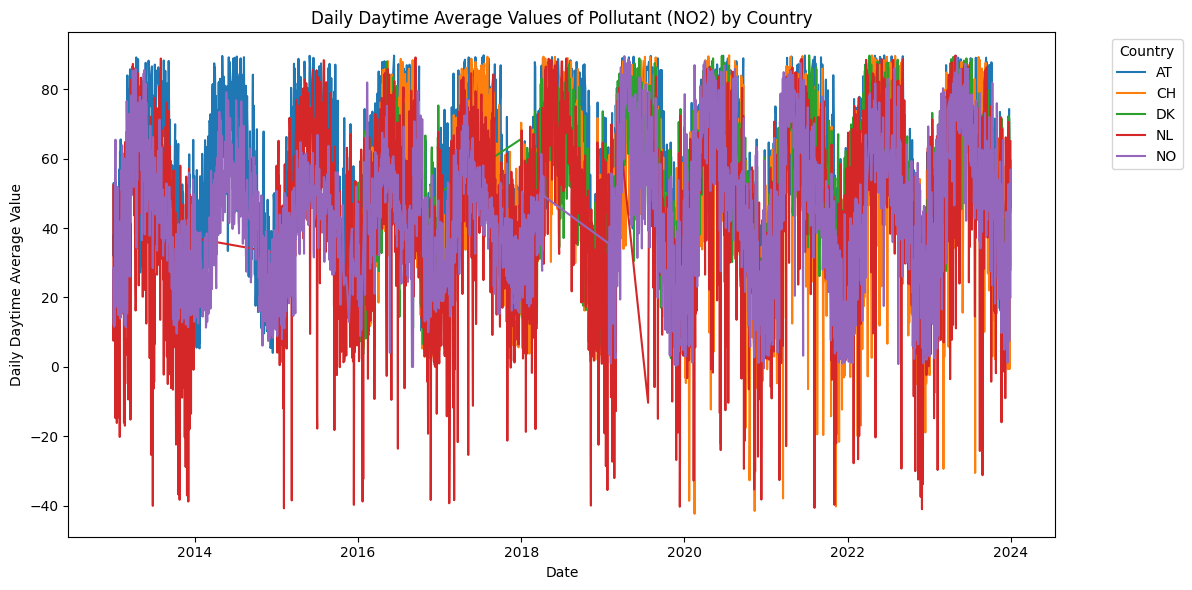

In [ ]:
import matplotlib.pyplot as plt

# Filter data for a specific pollutant (e.g., NO2) for better visualization
pollutant_to_visualize = 7  # NO2
filtered_data = daily_daytime_avg_per_country[daily_daytime_avg_per_country['Pollutant'] == pollutant_to_visualize]

# Plot the data
plt.figure(figsize=(12, 6))
for country in filtered_data['Country'].unique():
    country_data = filtered_data[filtered_data['Country'] == country]
    plt.plot(country_data['Date'], country_data['DailyDaytimeAverageValue'], label=country)

plt.title('Daily Daytime Average Values of Pollutant (NO2) by Country')
plt.xlabel('Date')
plt.ylabel('Daily Daytime Average Value')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Peak-traffic hour windows

In [ ]:
# Filter data for the specified time ranges
peak_traffic_data = merged_data[
    ((merged_data['Start'].dt.time >= pd.to_datetime('06:00:00').time()) & 
     (merged_data['Start'].dt.time <= pd.to_datetime('10:00:00').time())) |
    ((merged_data['Start'].dt.time >= pd.to_datetime('16:00:00').time()) & 
     (merged_data['Start'].dt.time <= pd.to_datetime('20:00:00').time()))
]

# Compute daily mean for each pollutant value for each country
daily_peak_traffic_avg_per_country = (
    peak_traffic_data.groupby(['Country', 'Pollutant', peak_traffic_data['Start'].dt.date])['Value']
    .mean()
    .reset_index()
    .rename(columns={'Start': 'Date', 'Value': 'DailyPeakTrafficAverageValue'})
)

daily_peak_traffic_avg_per_country

,Country,Pollutant,Date,DailyPeakTrafficAverageValue
0,AT,5,2013-01-01,51.586312
1,AT,5,2013-01-02,31.677111
2,AT,5,2013-01-03,12.501949
3,AT,5,2013-01-04,8.393159
4,AT,5,2013-01-05,3.950906
...,...,...,...,...
92073,NO,6001,2023-12-27,22.545110
92074,NO,6001,2023-12-28,9.120578
92075,NO,6001,2023-12-29,7.111636
92076,NO,6001,2023-12-30,9.878856


In [ ]:
# Generate summary statistics
summary_stats = daily_peak_traffic_avg_per_country['DailyPeakTrafficAverageValue'].describe()
print(summary_stats)

# Remove outliers using the IQR method
Q1 = daily_peak_traffic_avg_per_country['DailyPeakTrafficAverageValue'].quantile(0.25)
Q3 = daily_peak_traffic_avg_per_country['DailyPeakTrafficAverageValue'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

daily_peak_traffic_avg_per_country = daily_peak_traffic_avg_per_country[
    (daily_peak_traffic_avg_per_country['DailyPeakTrafficAverageValue'] >= lower_bound) &
    (daily_peak_traffic_avg_per_country['DailyPeakTrafficAverageValue'] <= upper_bound)
]

daily_peak_traffic_avg_per_country

count    9.207800e+04
mean    -3.375996e+02
std      1.958049e+05
min     -5.595444e+07
25%      7.274157e+00
50%      1.918641e+01
75%      4.003498e+01
max      1.552745e+07
Name: DailyPeakTrafficAverageValue, dtype: float64


,Country,Pollutant,Date,DailyPeakTrafficAverageValue
0,AT,5,2013-01-01,51.586312
1,AT,5,2013-01-02,31.677111
2,AT,5,2013-01-03,12.501949
3,AT,5,2013-01-04,8.393159
4,AT,5,2013-01-05,3.950906
...,...,...,...,...
92073,NO,6001,2023-12-27,22.545110
92074,NO,6001,2023-12-28,9.120578
92075,NO,6001,2023-12-29,7.111636
92076,NO,6001,2023-12-30,9.878856


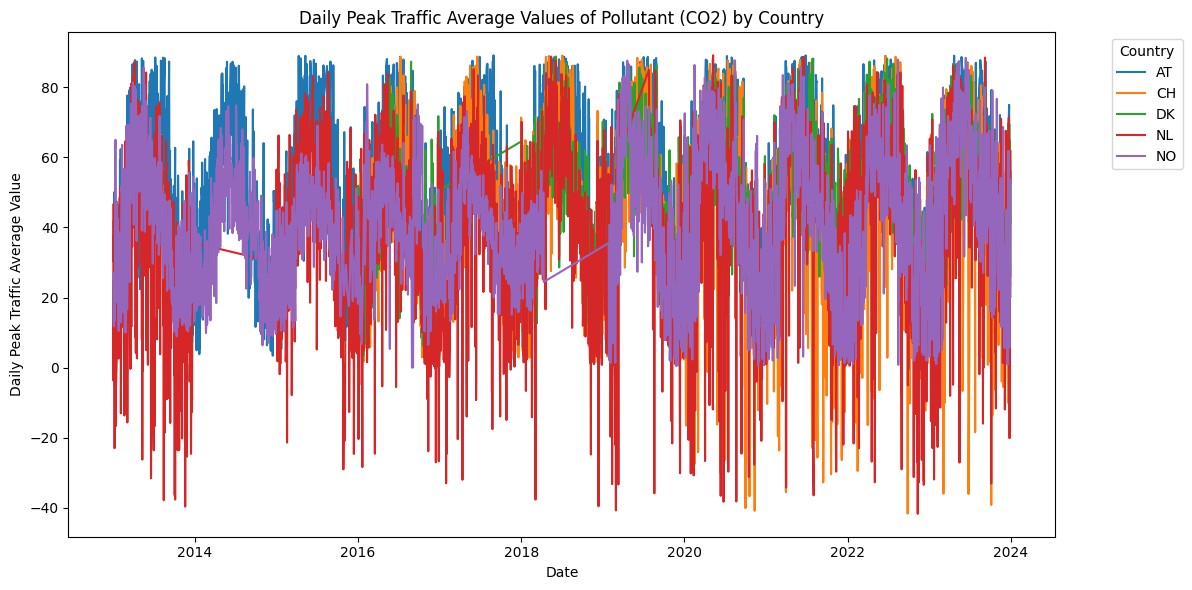

In [ ]:
# Filter data for a specific pollutant (e.g., NO2) for better visualization
pollutant_to_visualize = 7 # CO2
filtered_data = daily_peak_traffic_avg_per_country[daily_peak_traffic_avg_per_country['Pollutant'] == pollutant_to_visualize]

# Plot the data
plt.figure(figsize=(12, 6))
for country in filtered_data['Country'].unique():
    country_data = filtered_data[filtered_data['Country'] == country]
    plt.plot(country_data['Date'], country_data['DailyPeakTrafficAverageValue'], label=country)

plt.title('Daily Peak Traffic Average Values of Pollutant (CO2) by Country')
plt.xlabel('Date')
plt.ylabel('Daily Peak Traffic Average Value')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

All data sourced from the European Alternative Fuels (AF) Observatory:

[country_identifier]_psg_vehicle_fleetdata:
AF Fleet percentage of total fleet (M1)
Fleet of alternative fuelled (BEV, PHEV, H2, LPG, CNG, LNG) passenger cars as a percentage of the total fleet.

[country_identifier]_psg_vehicle_fleetdata:
AF New registrations (M1)
Number of newly registered alternative fuelled (BEV, PHEV, H2, LPG, CNG, LNG) passenger cars (M1).

[country_identifier]_psg_vehicle_fleetdata:
AF Market share of total registrations (M1)
Newly registered alternative fuelled (BEV, PHEV, H2, LPG, CNG, LNG) passenger cars as a percentage of the total number of registrations.

In [5]:
import pandas as pd
import os

# Debug: Check the current working directory
print("Current Working Directory:", os.getcwd())

# Set the path to the raw data folder
data_path = "../data/raw/fleet_data"  # Relative path to the raw data folder

# Verify if the path exists
if not os.path.exists(data_path):
    print(f"Relative path '{data_path}' not found. Using absolute path instead.")
    data_path = "c:/Users/jskif/OneDrive - epfl.ch/Documents/SMT/DSML/DSML/data/raw"

# List all CSV files in the raw data folder
csv_files = [file for file in os.listdir(data_path) if file.endswith(".csv")]

# Initialize dictionaries to store DataFrames for each file type
newreg_dataframes = {}
eu_dataframes = {}
registrations_dataframes = {}

# Process files based on their type
for file in csv_files:
    country_name = file.split("_")[0]  # Extract country name from the file name
    file_path = os.path.join(data_path, file)

    if file.endswith("newreg.csv"):
        newreg_dataframes[country_name] = pd.read_csv(file_path)
    elif file.endswith("EU.csv"):
        eu_dataframes[country_name] = pd.read_csv(file_path)
    elif file.endswith("registrations.csv"):
        registrations_dataframes[country_name] = pd.read_csv(file_path)

# Combine datasets for each file type
combined_newreg_df = pd.concat(newreg_dataframes.values(), keys=newreg_dataframes.keys(), names=["Country", "Index"]).reset_index()
combined_fleet_df = pd.concat(eu_dataframes.values(), keys=eu_dataframes.keys(), names=["Country", "Index"]).reset_index()
combined_registrations_mktshare_df = pd.concat(registrations_dataframes.values(), keys=registrations_dataframes.keys(), names=["Country", "Index"]).reset_index()

# Display basic information about the combined datasets
print("Combined New Registrations Dataset Info:")
print(combined_newreg_df.info())

print("\nCombined EU Dataset Info:")
print(combined_fleet_df.info())

print("\nCombined Registrations Dataset Info:")
print(combined_registrations_mktshare_df.info())

# Change the name of the Category column in each file to "Year"
combined_newreg_df.rename(columns={"Category": "Year"}, inplace=True)
combined_fleet_df.rename(columns={"Category": "Year"}, inplace=True)
combined_registrations_mktshare_df.rename(columns={"Category": "Year"}, inplace=True)

# Save the combined datasets to the processed folder
processed_path = "../data/processed"
os.makedirs(processed_path, exist_ok=True)

combined_newreg_df.to_csv(os.path.join(processed_path, "combined_newreg_data.csv"), index=False)
combined_fleet_df.to_csv(os.path.join(processed_path, "combined_fleet_data.csv"), index=False)
combined_registrations_mktshare_df.to_csv(os.path.join(processed_path, "combined_registrations_mktshare_data.csv"), index=False)

print(f"Combined datasets saved to {processed_path}/")  

Current Working Directory: /
Relative path '../data/raw/fleet_data' not found. Using absolute path instead.


FileNotFoundError: [Errno 2] No such file or directory: 'c:/Users/jskif/OneDrive - epfl.ch/Documents/SMT/DSML/DSML/data/raw'

In [ ]:
import pandas as pd
import os

data_dir = "../data/processed"
output_dir = "../results"

def prepare_vehicle_data(filename, bev_col='BEV', af_cols=['BEV','PHEV','H2','LPG','CNG','LNG'], suffix=''):
    df = pd.read_csv(os.path.join(data_dir, filename))
    # Ensure columns exist
    cols = [c for c in af_cols if c in df.columns]
    # Group by Country, Year and sum/mean as appropriate
    group_cols = ['Country', 'Year']
    agg_df = df.groupby(group_cols)[cols].sum().reset_index()
    # Create AF column
    agg_df[f'AF{suffix}'] = agg_df[cols].sum(axis=1)
    # Keep only BEV and AF
    out = agg_df[group_cols + [bev_col, f'AF{suffix}']]
    out = out.rename(columns={bev_col: f'BEV{suffix}'})
    return out

# Prepare each vehicle dataset
fleet = prepare_vehicle_data("combined_fleet_data.csv", suffix='_fleet')
newreg = prepare_vehicle_data("combined_newreg_data.csv", suffix='_newreg')
mktshare = prepare_vehicle_data("combined_registrations_mktshare_data.csv", suffix='_mktshare')

# Merge all into one
vehicle_data = fleet.merge(newreg, on=['Country','Year']).merge(mktshare, on=['Country','Year'])
vehicle_data.to_csv(os.path.join(data_dir, "combined_vehicle_data.csv"), index=False)

# Air quality (AQ) data pre-processing (done locally, files too large for GitHub)

In [ ]:
!pip install pandas pyarrow
import pandas as pd
import os

input_folder = "/Users/clarabottinelli/Desktop/PQ_downloads"
output_folder = "/Users/clarabottinelli/Desktop/CSV_downloads"

for file in os.listdir(input_folder):
    if file.endswith(".parquet"):
        df = pd.read_parquet(os.path.join(input_folder, file))
        csv_filename = file.replace(".parquet", ".csv")
        df.to_csv(os.path.join(output_folder, csv_filename), index=False)


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [10]:
samplingpoint_data = {}

for csv_file in os.listdir(output_folder):
    if csv_file.endswith(".csv"):
        file_path = os.path.join(output_folder, csv_file)
        df = pd.read_csv(file_path)
        
        #group dataframe by Samplingpoint
        for samplingpoint, group in df.groupby("Samplingpoint"):
            if samplingpoint not in samplingpoint_data:
                samplingpoint_data[samplingpoint] = group
            else:
                samplingpoint_data[samplingpoint] = pd.concat([samplingpoint_data[samplingpoint], group], ignore_index=True)

#merge dataframe with datapoints for all Samplingpoints
merged_data = pd.concat(samplingpoint_data.values(), ignore_index=True)
merged_data

,Samplingpoint,Pollutant,Start,End,Value,Unit,AggType,Validity,Verification,ResultTime,DataCapture,FkObservationLog
0,NO/SPO_NO0073A_38_1785,38,2019-01-01 00:00:00,2019-01-01 01:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4
1,NO/SPO_NO0073A_38_1785,38,2019-01-01 01:00:00,2019-01-01 02:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4
2,NO/SPO_NO0073A_38_1785,38,2019-01-01 02:00:00,2019-01-01 03:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4
3,NO/SPO_NO0073A_38_1785,38,2019-01-01 03:00:00,2019-01-01 04:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4
4,NO/SPO_NO0073A_38_1785,38,2019-01-01 04:00:00,2019-01-01 05:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4
...,...,...,...,...,...,...,...,...,...,...,...,...
18827637,NL/SPO-NL00003_00009_101,9,2023-12-31 19:00:00,2023-12-31 20:00:00,5.4933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd
18827638,NL/SPO-NL00003_00009_101,9,2023-12-31 20:00:00,2023-12-31 21:00:00,4.9933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd
18827639,NL/SPO-NL00003_00009_101,9,2023-12-31 21:00:00,2023-12-31 22:00:00,5.6933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd
18827640,NL/SPO-NL00003_00009_101,9,2023-12-31 22:00:00,2023-12-31 23:00:00,5.3933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd


### Cleaning dataset

In [11]:
#identify pollutants corresponding to IDs used by EEA
pollutant_codes = {
    5: "NO",
    7: "CO2",
    8: "NO2",
    9: "PM2.5",
    38: "PM10",
    6001: "NOX as NO2"
}

merged_data['Notation'] = merged_data['Pollutant'].map(pollutant_codes)
merged_data

,Samplingpoint,Pollutant,Start,End,Value,Unit,AggType,Validity,Verification,ResultTime,DataCapture,FkObservationLog,Notation
0,NO/SPO_NO0073A_38_1785,38,2019-01-01 00:00:00,2019-01-01 01:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
1,NO/SPO_NO0073A_38_1785,38,2019-01-01 01:00:00,2019-01-01 02:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
2,NO/SPO_NO0073A_38_1785,38,2019-01-01 02:00:00,2019-01-01 03:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
3,NO/SPO_NO0073A_38_1785,38,2019-01-01 03:00:00,2019-01-01 04:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
4,NO/SPO_NO0073A_38_1785,38,2019-01-01 04:00:00,2019-01-01 05:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18827637,NL/SPO-NL00003_00009_101,9,2023-12-31 19:00:00,2023-12-31 20:00:00,5.4933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
18827638,NL/SPO-NL00003_00009_101,9,2023-12-31 20:00:00,2023-12-31 21:00:00,4.9933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
18827639,NL/SPO-NL00003_00009_101,9,2023-12-31 21:00:00,2023-12-31 22:00:00,5.6933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
18827640,NL/SPO-NL00003_00009_101,9,2023-12-31 22:00:00,2023-12-31 23:00:00,5.3933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5


In [12]:
print(merged_data['Pollutant'].unique())

[  38    8    7    5    9 6001]


In [13]:
#convert Start column to datetime and drop rows with NaT values
if not pd.api.types.is_datetime64_any_dtype(merged_data['Start']):
    merged_data['Start'] = pd.to_datetime(merged_data['Start'], errors='coerce', infer_datetime_format=True)

merged_data = merged_data.dropna(subset=['Start'])
merged_data

/var/folders/c8/hcty8r1j2xj189pdz208fpnr0000gn/T/ipykernel_99718/1018579409.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  merged_data['Start'] = pd.to_datetime(merged_data['Start'], errors='coerce', infer_datetime_format=True)


,Samplingpoint,Pollutant,Start,End,Value,Unit,AggType,Validity,Verification,ResultTime,DataCapture,FkObservationLog,Notation
0,NO/SPO_NO0073A_38_1785,38,2019-01-01 00:00:00,2019-01-01 01:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
1,NO/SPO_NO0073A_38_1785,38,2019-01-01 01:00:00,2019-01-01 02:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
2,NO/SPO_NO0073A_38_1785,38,2019-01-01 02:00:00,2019-01-01 03:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
3,NO/SPO_NO0073A_38_1785,38,2019-01-01 03:00:00,2019-01-01 04:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
4,NO/SPO_NO0073A_38_1785,38,2019-01-01 04:00:00,2019-01-01 05:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18827637,NL/SPO-NL00003_00009_101,9,2023-12-31 19:00:00,2023-12-31 20:00:00,5.4933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
18827638,NL/SPO-NL00003_00009_101,9,2023-12-31 20:00:00,2023-12-31 21:00:00,4.9933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
18827639,NL/SPO-NL00003_00009_101,9,2023-12-31 21:00:00,2023-12-31 22:00:00,5.6933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
18827640,NL/SPO-NL00003_00009_101,9,2023-12-31 22:00:00,2023-12-31 23:00:00,5.3933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5


In [14]:
#aggregate sampling points by country
merged_data.insert(0, 'Country', merged_data['Samplingpoint'].str[:2])
merged_data

,Country,Samplingpoint,Pollutant,Start,End,Value,Unit,AggType,Validity,Verification,ResultTime,DataCapture,FkObservationLog,Notation
0,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 00:00:00,2019-01-01 01:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
1,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 01:00:00,2019-01-01 02:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
2,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 02:00:00,2019-01-01 03:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
3,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 03:00:00,2019-01-01 04:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
4,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 04:00:00,2019-01-01 05:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18827637,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 19:00:00,2023-12-31 20:00:00,5.4933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
18827638,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 20:00:00,2023-12-31 21:00:00,4.9933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
18827639,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 21:00:00,2023-12-31 22:00:00,5.6933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
18827640,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 22:00:00,2023-12-31 23:00:00,5.3933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5


In [15]:
print(merged_data['Country'].value_counts())

Country
AT    4374113
NO    4167809
SE    3980463
NL    3541104
CH    1972275
DK     712692
Name: count, dtype: int64


In [16]:
#drop unnecessary columns
merged_data = merged_data.drop(columns=['ResultTime', 'DataCapture', 'FkObservationLog', 'Validity', 'Verification'])
# rename Notation column to Pollutant and remove pollutant column
merged_data = merged_data.rename(columns={'Notation': 'Pollutant'})
merged_data = merged_data.drop(columns=['Pollutant'])
merged_data

,Country,Samplingpoint,Pollutant,Start,End,Value,Unit,AggType,Notation
0,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 00:00:00,2019-01-01 01:00:00,-9900.0000,ug.m-3,hour,PM10
1,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 01:00:00,2019-01-01 02:00:00,-9900.0000,ug.m-3,hour,PM10
2,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 02:00:00,2019-01-01 03:00:00,-9900.0000,ug.m-3,hour,PM10
3,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 03:00:00,2019-01-01 04:00:00,-9900.0000,ug.m-3,hour,PM10
4,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 04:00:00,2019-01-01 05:00:00,-9900.0000,ug.m-3,hour,PM10
...,...,...,...,...,...,...,...,...,...
18827637,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 19:00:00,2023-12-31 20:00:00,5.4933,ug.m-3,hour,PM2.5
18827638,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 20:00:00,2023-12-31 21:00:00,4.9933,ug.m-3,hour,PM2.5
18827639,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 21:00:00,2023-12-31 22:00:00,5.6933,ug.m-3,hour,PM2.5
18827640,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 22:00:00,2023-12-31 23:00:00,5.3933,ug.m-3,hour,PM2.5


In [17]:
merged_data

,Country,Samplingpoint,Pollutant,Start,End,Value,Unit,AggType,Notation
0,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 00:00:00,2019-01-01 01:00:00,-9900.0000,ug.m-3,hour,PM10
1,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 01:00:00,2019-01-01 02:00:00,-9900.0000,ug.m-3,hour,PM10
2,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 02:00:00,2019-01-01 03:00:00,-9900.0000,ug.m-3,hour,PM10
3,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 03:00:00,2019-01-01 04:00:00,-9900.0000,ug.m-3,hour,PM10
4,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 04:00:00,2019-01-01 05:00:00,-9900.0000,ug.m-3,hour,PM10
...,...,...,...,...,...,...,...,...,...
18827637,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 19:00:00,2023-12-31 20:00:00,5.4933,ug.m-3,hour,PM2.5
18827638,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 20:00:00,2023-12-31 21:00:00,4.9933,ug.m-3,hour,PM2.5
18827639,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 21:00:00,2023-12-31 22:00:00,5.6933,ug.m-3,hour,PM2.5
18827640,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 22:00:00,2023-12-31 23:00:00,5.3933,ug.m-3,hour,PM2.5


### Cleaning dataset

# Air quality (AQ) cleaning 

In [19]:
output_csv_path = os.path.join(output_folder, "merged_data_export_2.csv")
merged_data.to_csv(output_csv_path, index=False)
print(f"Exported merged_data to {output_csv_path}")

Exported merged_data to /Users/clarabottinelli/Desktop/CSV_downloads/merged_data_export_2.csv


In [2]:
import pandas as pd
import numpy as np

# Load the merged air quality data
aq_df = pd.read_csv("../data/processed/AQ_merged_data_export_2.csv")

# Drop unnecessary columns
aq_cleaned = aq_df.drop(columns=['Samplingpoint', 'Pollutant', 'AggType'], errors='ignore')

# Keep only the 'End' column for datetime
aq_cleaned = aq_cleaned.rename(columns={'End': 'Datetime'})
if 'Start' in aq_cleaned.columns:
    aq_cleaned = aq_cleaned.drop(columns=['Start'])

# Convert 'Datetime' to pandas datetime
aq_cleaned['Datetime'] = pd.to_datetime(aq_cleaned['Datetime'], errors='coerce')
aq_cleaned = aq_cleaned.dropna(subset=['Datetime'])

# Extract date and hour for grouping
aq_cleaned['Date'] = aq_cleaned['Datetime'].dt.date
aq_cleaned['Hour'] = aq_cleaned['Datetime'].dt.hour

In [3]:
# Count NaN values for each Country and Notation
nan_counts = aq_cleaned.groupby(['Country', 'Notation'])['Value'].apply(lambda x: x.isna().sum()).reset_index(name='NaN_Count')

# Count negative values for each Country and Notation
neg_counts = aq_cleaned.groupby(['Country', 'Notation'])['Value'].apply(lambda x: (x < 0).sum()).reset_index(name='Negative_Count')

# Merge the two counts
value_issues = nan_counts.merge(neg_counts, on=['Country', 'Notation'])
print(value_issues)

   Country    Notation  NaN_Count  Negative_Count
0       AT         CO2          0              30
1       AT          NO          0               0
2       AT         NO2          0              34
3       AT  NOX as NO2          0               0
4       AT        PM10          0           14258
5       CH         CO2          0            2520
6       CH         NO2          0            2397
7       CH        PM10          0            4196
8       CH       PM2.5          0            2395
9       DK         CO2          0              33
10      DK          NO          0               0
11      DK         NO2          0              59
12      DK  NOX as NO2          0               9
13      DK        PM10          0            3871
14      DK       PM2.5          0              19
15      NL         CO2          0            9529
16      NL          NO          0           21599
17      NL         NO2          0           13531
18      NL  NOX as NO2          0           23066


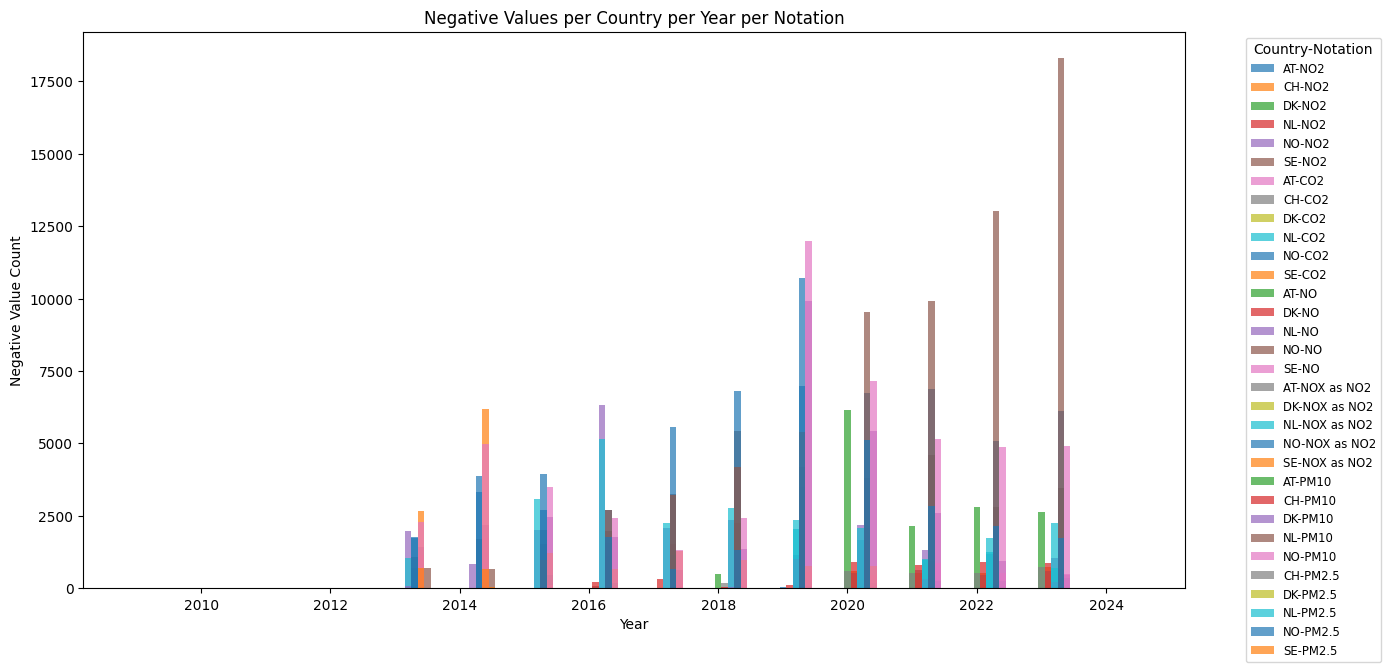

   Country    Notation  negative_proportion  nan_proportion
0       AT         CO2             0.000064             0.0
1       AT          NO             0.000000             0.0
2       AT         NO2             0.000023             0.0
3       AT  NOX as NO2             0.000000             0.0
4       AT        PM10             0.036029             0.0
5       CH         CO2             0.005343             0.0
6       CH         NO2             0.005086             0.0
7       CH        PM10             0.008903             0.0
8       CH       PM2.5             0.004291             0.0
9       DK         CO2             0.000269             0.0
10      DK          NO             0.000000             0.0
11      DK         NO2             0.000321             0.0
12      DK  NOX as NO2             0.000148             0.0
13      DK        PM10             0.024030             0.0
14      DK       PM2.5             0.000155             0.0
15      NL         CO2             0.036

In [4]:
import matplotlib.pyplot as plt

# from the datetime column, extract the year
aq_cleaned['Year'] = aq_cleaned['Datetime'].dt.year

# Calculate negative and NaN counts per Country, Year, Notation
neg_nan_stats = (
    aq_cleaned
    .groupby(['Country', 'Year', 'Notation'])
    .agg(
        total=('Value', 'size'),
        negative=('Value', lambda x: (x < 0).sum()),
        nan=('Value', lambda x: x.isna().sum())
    )
    .reset_index()
)

# Plot negative values per country per year per notation
fig, ax = plt.subplots(figsize=(14, 7))
for notation in neg_nan_stats['Notation'].unique():
    subset = neg_nan_stats[neg_nan_stats['Notation'] == notation]
    for country in subset['Country'].unique():
        country_data = subset[subset['Country'] == country]
        ax.bar(
            country_data['Year'] + (0.1 * list(subset['Country'].unique()).index(country)),
            country_data['negative'],
            width=0.1,
            label=f"{country}-{notation}" if notation == subset['Notation'].unique()[0] else "",
            alpha=0.7
        )
ax.set_xlabel('Year')
ax.set_ylabel('Negative Value Count')
ax.set_title('Negative Values per Country per Year per Notation')
ax.legend(title='Country-Notation', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()

# Calculate proportion of negative/NaN values per country per notation
prop_stats = (
    aq_cleaned
    .groupby(['Country', 'Notation'])
    .agg(
        total=('Value', 'size'),
        negative=('Value', lambda x: (x < 0).sum()),
        nan=('Value', lambda x: x.isna().sum())
    )
    .reset_index()
)
prop_stats['negative_proportion'] = prop_stats['negative'] / prop_stats['total']
prop_stats['nan_proportion'] = prop_stats['nan'] / prop_stats['total']

print(prop_stats[['Country', 'Notation', 'negative_proportion', 'nan_proportion']])

A non-trivial proportion (2–8%) of negative values in air quality data for pollutants like PM2.5, PM10, NO2, NO, CO2 is a common issue in environmental monitoring datasets. Here are the main reasons:

1. Instrument Noise and Detection Limits
Air quality sensors (especially for low concentrations) have a certain level of measurement noise.
When the true concentration is near zero, random fluctuations and instrument noise can result in negative readings.
This is especially true for automated, continuous analyzers (e.g., chemiluminescence for NOx, beta attenuation for PM).
2. Baseline Correction and Drift
Many instruments perform baseline or zero-point corrections. If the baseline is overestimated, actual readings can dip below zero.
Drift in instrument calibration over time can also cause negative values.
3. Data Processing and Averaging
Negative values can arise when averaging several low or noisy measurements (e.g., hourly or daily means).
Some data processing pipelines do not filter or correct negative values, especially if the negative values are within the instrument's stated uncertainty.
4. Quality Control Flags
Sometimes, negative values are left in the dataset to flag questionable or below-detection-limit data rather than being set to zero or marked as missing.
This allows downstream users to decide how to handle them.
5. Physical Meaning
Negative concentrations are not physically meaningful; they are always an artifact of measurement or processing.

For most analyses, negative values should be set to zero, treated as missing, or otherwise flagged, depending on your scientific question and the recommendations of the data provider.
In our case, the increasing number of negative values across the years would correspond very well with situations in which air quality improves. We therefore choose to set the values to 0.

References:
US EPA Air Sensor Guidebook (see "Negative Values")
EEA Air Quality Data Quality Control

In [5]:
# set Notation column name to 'Pollutant'
aq_cleaned = aq_cleaned.rename(columns={'Notation': 'Pollutant'})
aq_cleaned

,Country,Datetime,Value,Unit,Pollutant,Date,Hour,Year
0,NO,2019-01-01 01:00:00,-9900.0000,ug.m-3,PM10,2019-01-01,1,2019
1,NO,2019-01-01 02:00:00,-9900.0000,ug.m-3,PM10,2019-01-01,2,2019
2,NO,2019-01-01 03:00:00,-9900.0000,ug.m-3,PM10,2019-01-01,3,2019
3,NO,2019-01-01 04:00:00,-9900.0000,ug.m-3,PM10,2019-01-01,4,2019
4,NO,2019-01-01 05:00:00,-9900.0000,ug.m-3,PM10,2019-01-01,5,2019
...,...,...,...,...,...,...,...,...
18748451,NL,2023-12-31 20:00:00,5.4933,ug.m-3,PM2.5,2023-12-31,20,2023
18748452,NL,2023-12-31 21:00:00,4.9933,ug.m-3,PM2.5,2023-12-31,21,2023
18748453,NL,2023-12-31 22:00:00,5.6933,ug.m-3,PM2.5,2023-12-31,22,2023
18748454,NL,2023-12-31 23:00:00,5.3933,ug.m-3,PM2.5,2023-12-31,23,2023


In [6]:
# remove values pre-2012 (entry mistake)
aq_cleaned = aq_cleaned[aq_cleaned['Year'] >= 2012]
# remove values in 2024 (there are almost no values)
aq_cleaned = aq_cleaned[aq_cleaned['Year'] < 2024]
aq_cleaned

,Country,Datetime,Value,Unit,Pollutant,Date,Hour,Year
0,NO,2019-01-01 01:00:00,-9900.0000,ug.m-3,PM10,2019-01-01,1,2019
1,NO,2019-01-01 02:00:00,-9900.0000,ug.m-3,PM10,2019-01-01,2,2019
2,NO,2019-01-01 03:00:00,-9900.0000,ug.m-3,PM10,2019-01-01,3,2019
3,NO,2019-01-01 04:00:00,-9900.0000,ug.m-3,PM10,2019-01-01,4,2019
4,NO,2019-01-01 05:00:00,-9900.0000,ug.m-3,PM10,2019-01-01,5,2019
...,...,...,...,...,...,...,...,...
18748450,NL,2023-12-31 19:00:00,5.5467,ug.m-3,PM2.5,2023-12-31,19,2023
18748451,NL,2023-12-31 20:00:00,5.4933,ug.m-3,PM2.5,2023-12-31,20,2023
18748452,NL,2023-12-31 21:00:00,4.9933,ug.m-3,PM2.5,2023-12-31,21,2023
18748453,NL,2023-12-31 22:00:00,5.6933,ug.m-3,PM2.5,2023-12-31,22,2023


In [7]:
# Count number of entries per year, per pollutant, per country
year_counts = (
    aq_cleaned.groupby(['Country', 'Pollutant', 'Year'])
    .size()
    .reset_index(name='Entry_Count')
)

# Show available years per country and pollutant, with counts
for (country, pollutant), group in year_counts.groupby(['Country', 'Pollutant']):
    years = group[['Year', 'Entry_Count']].sort_values('Year')
    print(f"{country} - {pollutant}:")
    print(years.to_string(index=False))
    print("-" * 40)

AT - CO2:
 Year  Entry_Count
 2013        43795
 2014        43800
 2015        43800
 2016        43920
 2017        36362
 2018        43800
 2019        43800
 2020        35138
 2021        44375
 2022        43800
 2023        43800
----------------------------------------
AT - NO:
 Year  Entry_Count
 2013       105108
 2014       105120
 2015       113879
 2016       114192
 2017       113880
 2018       113880
 2019       112657
 2020       114169
 2021       106297
 2022       113880
 2023       105098
----------------------------------------
AT - NO2:
 Year  Entry_Count
 2013       140121
 2014       140160
 2015       140137
 2016       133128
 2017       131400
 2018       131400
 2019       131400
 2020       131760
 2021       131400
 2022       131400
 2023       127777
----------------------------------------
AT - NOX as NO2:
 Year  Entry_Count
 2013        43795
 2014        52560
 2015        52560
 2016        17575
 2017        52556
 2018        52560
 2019       11

In [8]:
# Set negative (measurement error) values to 0
aq_cleaned.loc[aq_cleaned['Value'] < 0, 'Value'] = 0

# Check if any negative values remain
print("Negative values remaining:", (aq_cleaned['Value'] < 0).sum())

Negative values remaining: 0


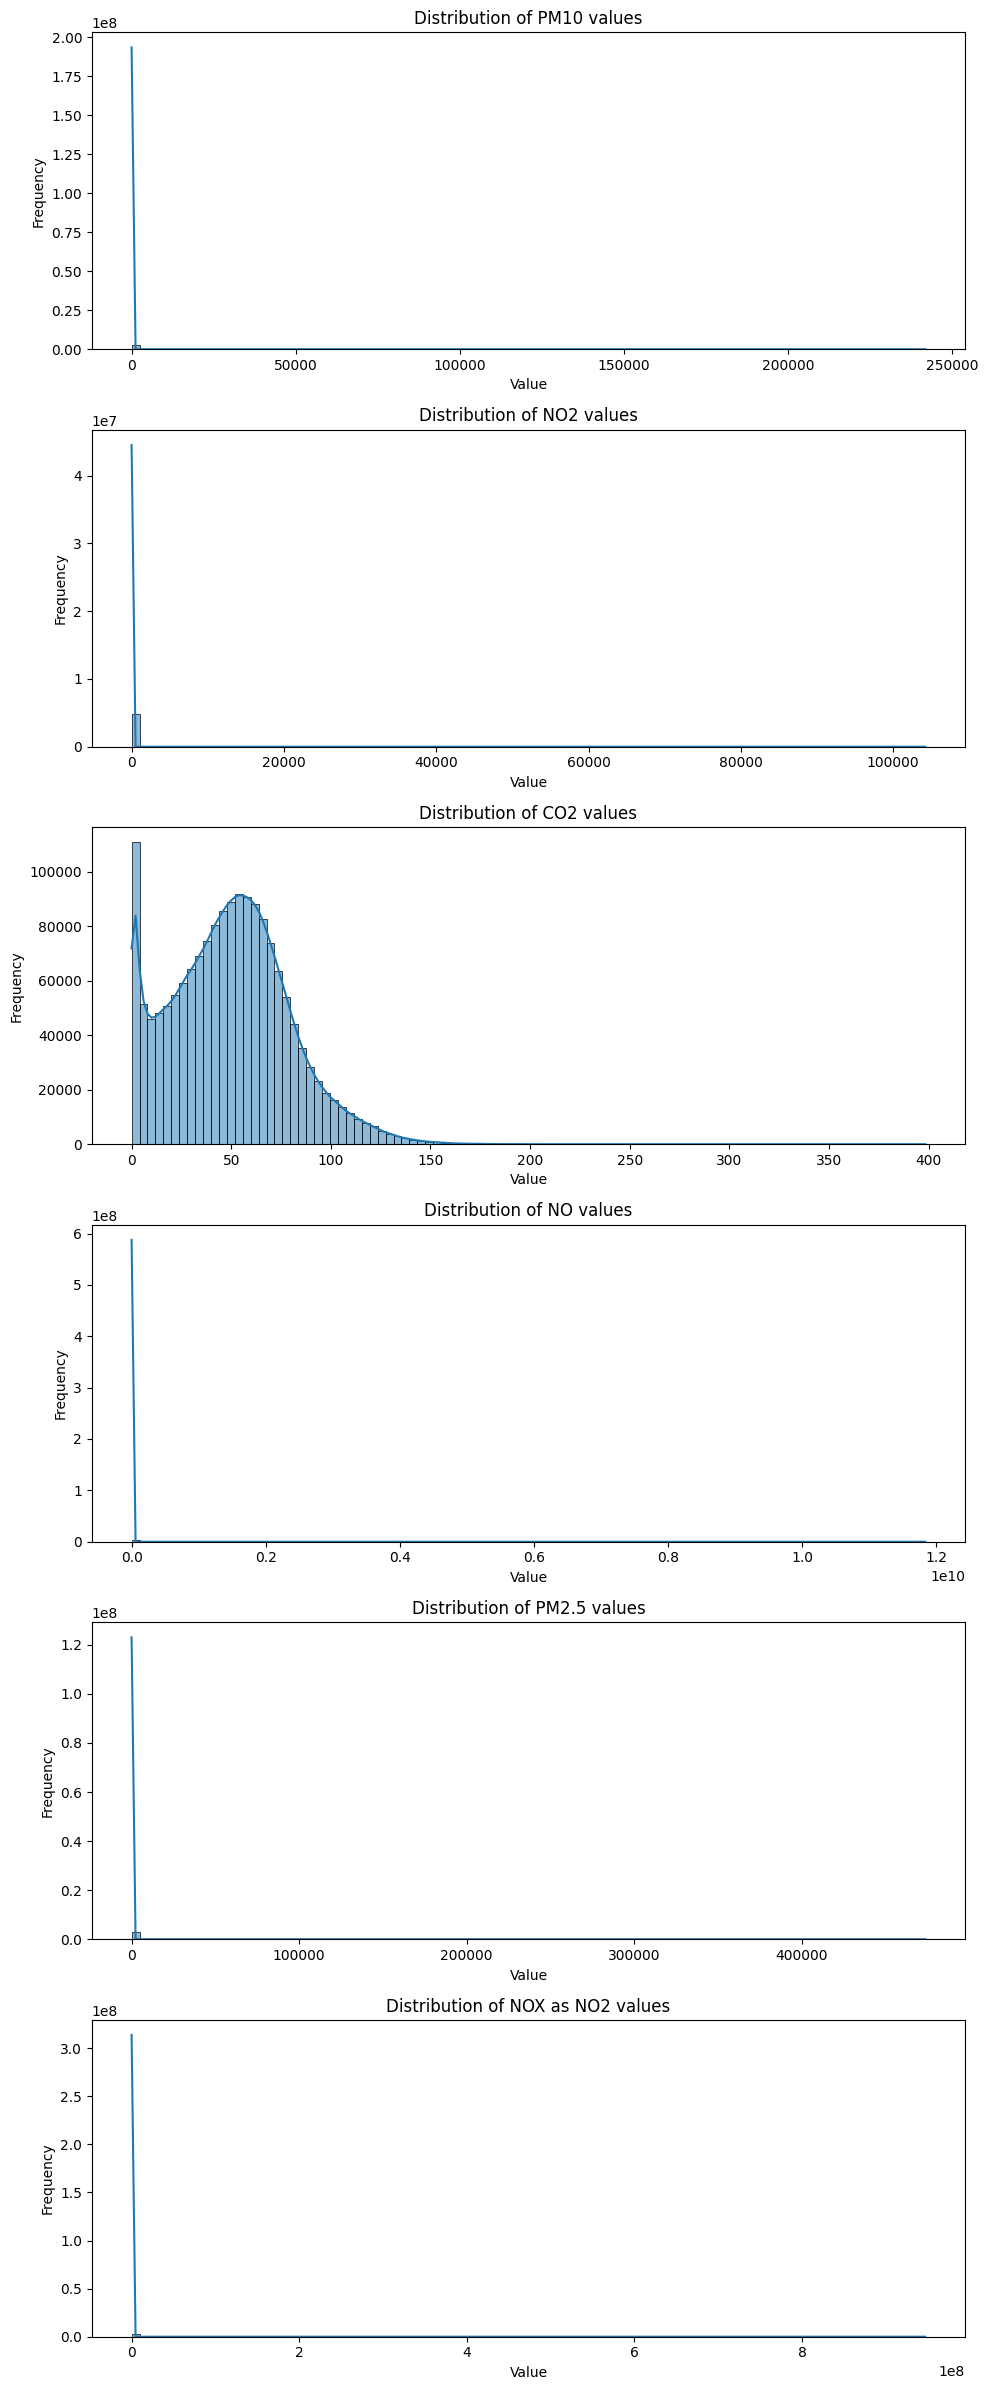

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution for each pollutant to visually inspect outliers
pollutants = aq_cleaned['Pollutant'].unique()
fig, axes = plt.subplots(len(pollutants), 1, figsize=(10, 4 * len(pollutants)), sharex=False)

for i, pollutant in enumerate(pollutants):
    ax = axes[i] if len(pollutants) > 1 else axes
    sns.histplot(
        aq_cleaned[aq_cleaned['Pollutant'] == pollutant]['Value'],
        bins=100, kde=True, ax=ax
    )
    ax.set_title(f'Distribution of {pollutant} values')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [10]:
import numpy as np

# Function to detect and handle outliers for each pollutant
def handle_outliers(df, value_col='Value', group_col='Pollutant', method='iqr', replace='nan'):
    df_out = df.copy()
    for pollutant in df[group_col].unique():
        mask = df[group_col] == pollutant
        values = df.loc[mask, value_col]
        if method == 'iqr':
            Q1 = values.quantile(0.25)
            Q3 = values.quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
        elif method == 'zscore':
            mean = values.mean()
            std = values.std()
            lower = mean - 3 * std
            upper = mean + 3 * std
        else:
            raise ValueError("Unknown method")
        outlier_mask = (values < lower) | (values > upper)
        if replace == 'nan':
            df_out.loc[mask & outlier_mask, value_col] = np.nan
        elif replace == 'clip':
            df_out.loc[mask & (values < lower), value_col] = lower
            df_out.loc[mask & (values > upper), value_col] = upper
        elif replace == 'remove':
            df_out = df_out[~(mask & outlier_mask)]
        else:
            raise ValueError("Unknown replace option")
    return df_out

# Example usage: replace outliers with NaN using IQR per pollutant
aq_cleaned_no_outliers = handle_outliers(aq_cleaned, value_col='Value', group_col='Pollutant', method='iqr', replace='nan')

# Show how many outliers were replaced per pollutant
for pollutant in aq_cleaned['Pollutant'].unique():
    n_out = aq_cleaned[aq_cleaned['Pollutant'] == pollutant]['Value'].isna().sum()
    n_out_new = aq_cleaned_no_outliers[aq_cleaned_no_outliers['Pollutant'] == pollutant]['Value'].isna().sum()
    print(f"{pollutant}: {n_out_new - n_out} outliers replaced with NaN")

PM10: 295579 outliers replaced with NaN
NO2: 171972 outliers replaced with NaN
CO2: 13314 outliers replaced with NaN
NO: 203482 outliers replaced with NaN
PM2.5: 227499 outliers replaced with NaN
NOX as NO2: 191423 outliers replaced with NaN


In [12]:
# Calculate number of NaN values per country and pollutant after outlier removal
nan_counts_outliers = (
    aq_cleaned_no_outliers.groupby(['Country', 'Pollutant'])['Value']
    .apply(lambda x: x.isna().sum())
    .reset_index(name='NaN_Outliers')
)
# Calculate total counts per country and pollutant
total_counts = aq_cleaned.groupby(['Country', 'Pollutant'])['Value'].size().reset_index(name='Total_Count')

# Merge with nan_counts_outliers to get NaN counts after outlier removal
nan_stats = nan_counts_outliers.merge(total_counts, on=['Country', 'Pollutant'])

# Calculate proportions
nan_stats['%_Removed'] = 100 * nan_stats['NaN_Outliers'] / nan_stats['Total_Count']
nan_stats['%_Remaining'] = 100 * (1 - nan_stats['NaN_Outliers'] / nan_stats['Total_Count'])

# Display summary
print(nan_stats[['Country', 'Pollutant', 'Total_Count', 'NaN_Outliers', '%_Removed', '%_Remaining']])


   Country   Pollutant  Total_Count  NaN_Outliers  %_Removed  %_Remaining
0       AT         CO2       466390          6265   1.343296    98.656704
1       AT          NO      1218160         63172   5.185854    94.814146
2       AT         NO2      1470083         33430   2.274021    97.725979
3       AT  NOX as NO2       823700        101829  12.362389    87.637611
4       AT        PM10       395732          5782   1.461090    98.538910
5       CH         CO2       471595          5150   1.092039    98.907961
6       CH         NO2       471263         10795   2.290653    97.709347
7       CH        PM10       471283         48764  10.347074    89.652926
8       CH       PM2.5       558106         36887   6.609318    93.390682
9       DK         CO2       122734           192   0.156436    99.843564
10      DK          NO        61366          6333  10.320047    89.679953
11      DK         NO2       184075          3491   1.896510    98.103490
12      DK  NOX as NO2        60708   

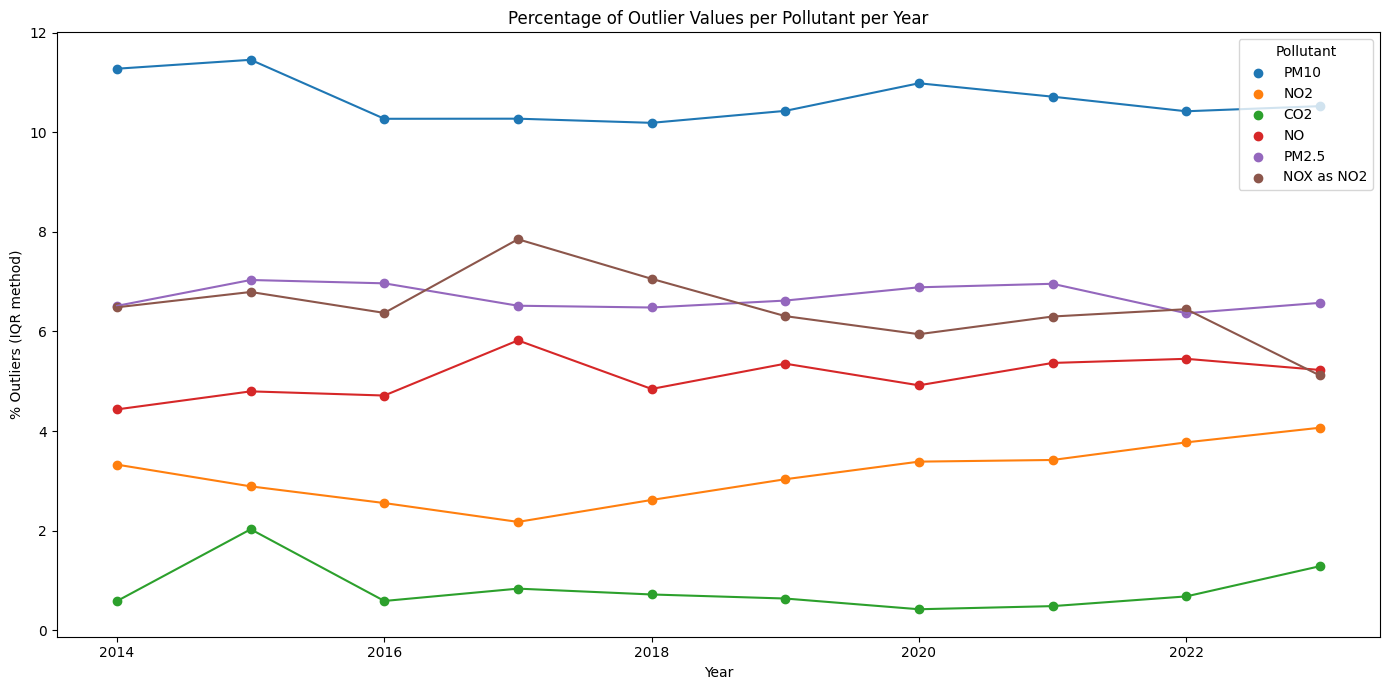

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate outlier percentage per pollutant per year using IQR method
outlier_stats = []

for pollutant in aq_cleaned['Pollutant'].unique():
    for year in aq_cleaned['Year'].unique():
        mask = (aq_cleaned['Pollutant'] == pollutant) & (aq_cleaned['Year'] == year)
        values = aq_cleaned.loc[mask, 'Value']
        if len(values) == 0:
            continue
        Q1 = values.quantile(0.25)
        Q3 = values.quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = ((values < lower) | (values > upper)).sum()
        total = len(values)
        outlier_stats.append({
            'Pollutant': pollutant,
            'Year': year,
            'Total': total,
            'Outliers': outliers,
            'Outlier_Percent': 100 * outliers / total if total > 0 else np.nan
        })

outlier_stats_df = pd.DataFrame(outlier_stats)

# Plot: Outlier percentage per pollutant per year (only connect 2014-2024)
plt.figure(figsize=(14, 7))
for pollutant in outlier_stats_df['Pollutant'].unique():
    subset = outlier_stats_df[outlier_stats_df['Pollutant'] == pollutant]
    # Filter for years 2014 to 2024
    mask = (subset['Year'] >= 2014) & (subset['Year'] <= 2024)
    subset_2014_2024 = subset[mask].sort_values('Year')
    # Plot only the points for all years
    plt.scatter(subset_2014_2024['Year'], subset_2014_2024['Outlier_Percent'], label=pollutant)
    # Draw lines only between consecutive years in 2014-2024
    plt.plot(subset_2014_2024['Year'], subset_2014_2024['Outlier_Percent'])

plt.xlabel('Year')
plt.ylabel('% Outliers (IQR method)')
plt.title('Percentage of Outlier Values per Pollutant per Year')
plt.legend(title='Pollutant')
plt.tight_layout()
plt.show()

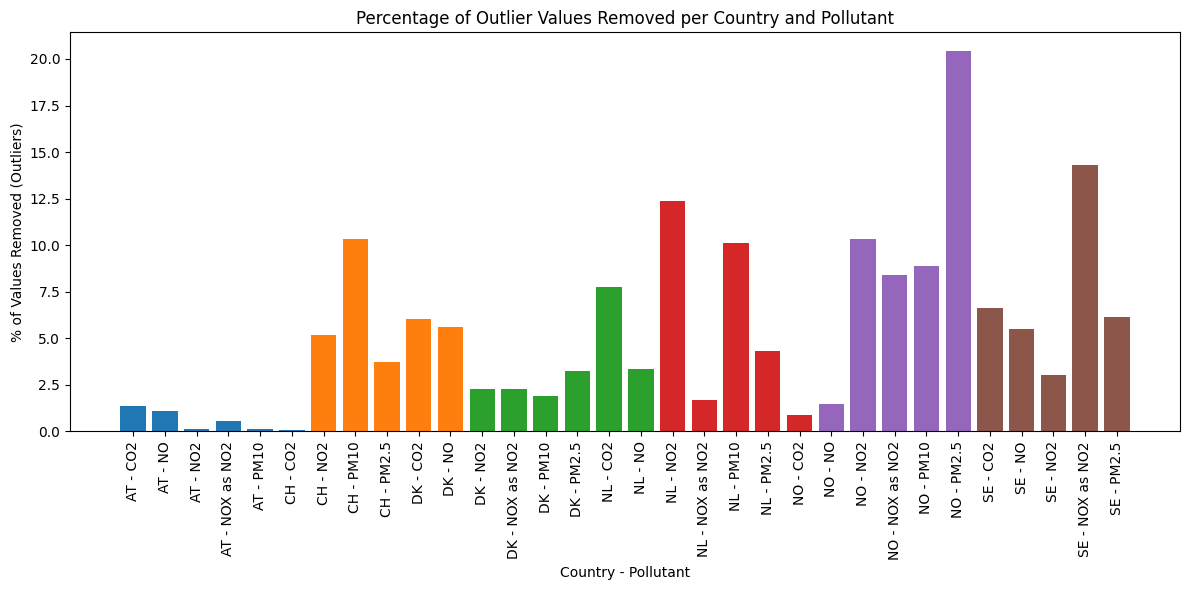

In [14]:
import matplotlib.pyplot as plt

# Plot %_Removed per pollutant and country
fig, ax = plt.subplots(figsize=(12, 6))
for pollutant in nan_stats['Pollutant'].unique():
    subset = nan_stats[nan_stats['Pollutant'] == pollutant]
    ax.bar(subset['Country'] + " - " + pollutant, subset['%_Removed'], label=pollutant)

ax.set_ylabel('% of Values Removed (Outliers)')
ax.set_xlabel('Country - Pollutant')
ax.set_title('Percentage of Outlier Values Removed per Country and Pollutant')
ax.set_xticks(range(len(nan_stats)))
ax.set_xticklabels(nan_stats['Country'] + " - " + nan_stats['Pollutant'], rotation=90)
plt.tight_layout()
plt.show()

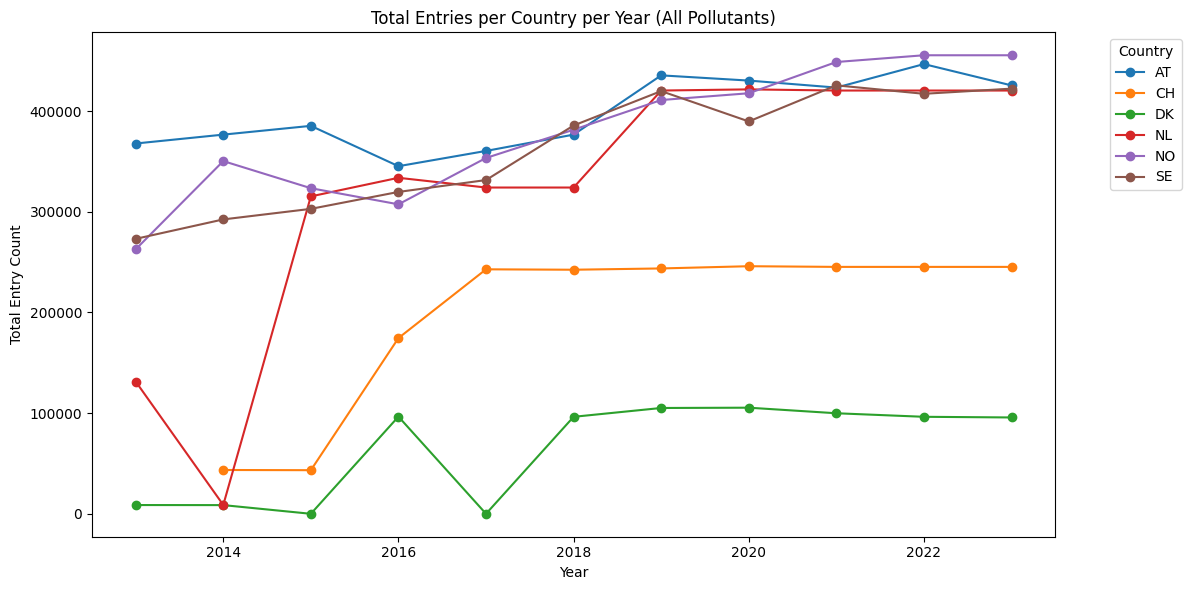

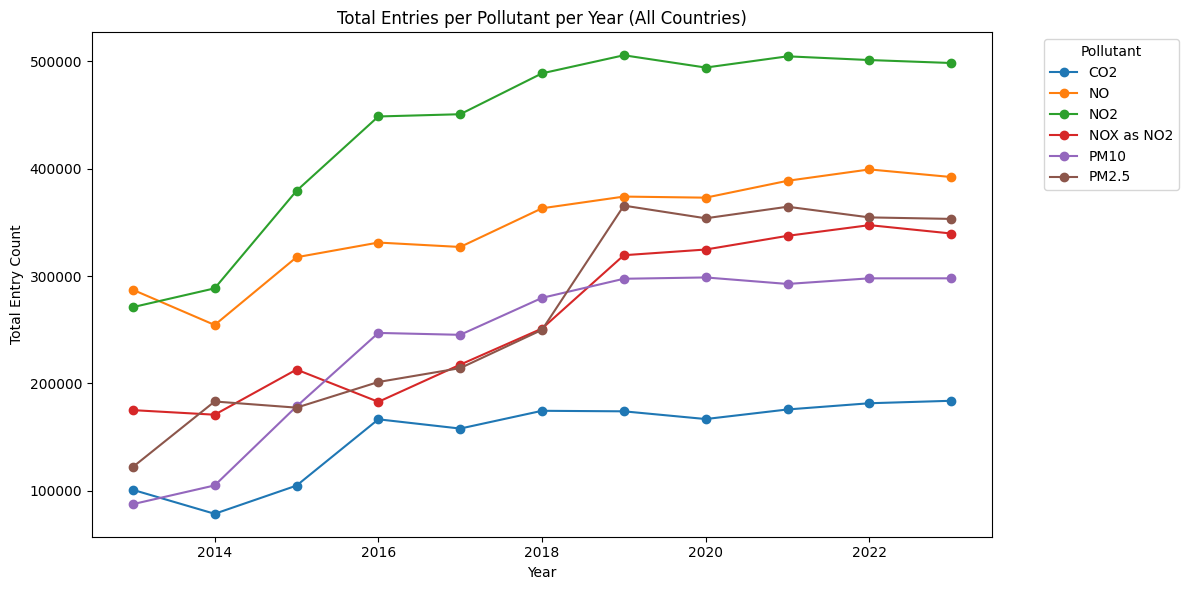

In [15]:
import matplotlib.pyplot as plt

# exclude year 2024 data points and before 2012
aq_cleaned_no_outliers = aq_cleaned_no_outliers[aq_cleaned_no_outliers['Year'] >= 2012]
aq_cleaned_no_outliers = aq_cleaned_no_outliers[aq_cleaned_no_outliers['Year'] != 2024]

# Count number of entries per year, per pollutant, per country
year_counts = (
    aq_cleaned_no_outliers.groupby(['Country', 'Pollutant', 'Year'])
    .size()
    .reset_index(name='Entry_Count')
)

# 1. Total entries per country per year (across all pollutants)
country_year = (
    year_counts.groupby(['Country', 'Year'])['Entry_Count']
    .sum()
    .reset_index()
)

plt.figure(figsize=(12, 6))
for country in country_year['Country'].unique():
    data = country_year[country_year['Country'] == country]
    plt.plot(data['Year'], data['Entry_Count'], marker='o', label=country)
plt.title('Total Entries per Country per Year (All Pollutants)')
plt.xlabel('Year')
plt.ylabel('Total Entry Count')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2. Total entries per pollutant per year (across all countries)
pollutant_year = (
    year_counts.groupby(['Pollutant', 'Year'])['Entry_Count']
    .sum()
    .reset_index()
)

plt.figure(figsize=(12, 6))
for pollutant in pollutant_year['Pollutant'].unique():
    data = pollutant_year[pollutant_year['Pollutant'] == pollutant]
    plt.plot(data['Year'], data['Entry_Count'], marker='o', label=pollutant)
plt.title('Total Entries per Pollutant per Year (All Countries)')
plt.xlabel('Year')
plt.ylabel('Total Entry Count')
plt.legend(title='Pollutant', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [16]:
aq_cleaned_no_outliers.to_csv("../data/processed/AQ_merged_cleaned.csv", index=False)
print("aq_cleaned_no_outliers exported to ../data/processed/AQ_merged_cleaned.csv")

aq_cleaned_no_outliers exported to ../data/processed/AQ_merged_cleaned.csv


# AQ annual datasets creation

In [17]:
import pandas as pd

aq_cleaned = pd.read_csv("../data/processed/AQ_merged_cleaned.csv")
aq_cleaned.head()

,Country,Datetime,Value,Unit,Pollutant,Date,Hour,Year
0,NO,2019-01-01 01:00:00,0.0,ug.m-3,PM10,2019-01-01,1,2019
1,NO,2019-01-01 02:00:00,0.0,ug.m-3,PM10,2019-01-01,2,2019
2,NO,2019-01-01 03:00:00,0.0,ug.m-3,PM10,2019-01-01,3,2019
3,NO,2019-01-01 04:00:00,0.0,ug.m-3,PM10,2019-01-01,4,2019
4,NO,2019-01-01 05:00:00,0.0,ug.m-3,PM10,2019-01-01,5,2019


## Averages per year per weekday, weekend and entire week

In [19]:
import pandas as pd
import numpy as np

# Load the cleaned air quality data
aq_cleaned = pd.read_csv("../data/processed/AQ_merged_cleaned.csv", parse_dates=["Datetime", "Date"])

# Add weekday/weekend columns
aq_cleaned['Weekday'] = aq_cleaned['Datetime'].dt.weekday
aq_cleaned['IsWeekend'] = aq_cleaned['Weekday'] >= 5

# Define masks for daytime and rush-hour (based on 'Hour' column: 1 = 1am, 23 = 11pm)
daytime_mask = aq_cleaned['Hour'].between(9, 18)  # 9:00 to 18:00 inclusive
rush_mask = aq_cleaned['Hour'].between(8, 10) | aq_cleaned['Hour'].between(15, 18)  # 8-10 and 15-18

def annual_avg(df, mask, period):
    # period: 'fullweek', 'weekday', 'weekend'
    if period == 'weekday':
        df = df[~df['IsWeekend']]
    elif period == 'weekend':
        df = df[df['IsWeekend']]
    df = df[mask]
    return (
        df.groupby(['Country', 'Pollutant', 'Year'])['Value']
        .mean()
        .reset_index()
        .rename(columns={'Value': f'AnnualAvg_{period}'})
    )

results = []
for period in ['fullweek', 'weekday', 'weekend']:
    # Daytime
    dt_avg = annual_avg(aq_cleaned, daytime_mask, period)
    dt_avg['Type'] = 'Daytime'
    results.append(dt_avg)
    # Rush-hour
    rh_avg = annual_avg(aq_cleaned, rush_mask, period)
    rh_avg['Type'] = 'RushHour'
    results.append(rh_avg)

# Concatenate and pivot for clarity
annual_averages = pd.concat(results, ignore_index=True)
annual_averages = annual_averages.pivot_table(
    index=['Country', 'Pollutant', 'Year'],
    columns=['Type'],
    values=['AnnualAvg_fullweek', 'AnnualAvg_weekday', 'AnnualAvg_weekend']
).reset_index()

# Flatten columns
annual_averages.columns = ['_'.join([str(i) for i in col if i]) for col in annual_averages.columns.values]

# Save to processed folder
annual_averages.to_csv("../data/processed/AQ_annual_averages.csv", index=False)

annual_averages.head()

C:\Users\jskif\AppData\Local\Temp\ipykernel_9732\4085457184.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[mask]
C:\Users\jskif\AppData\Local\Temp\ipykernel_9732\4085457184.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[mask]
C:\Users\jskif\AppData\Local\Temp\ipykernel_9732\4085457184.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[mask]
C:\Users\jskif\AppData\Local\Temp\ipykernel_9732\4085457184.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[mask]


,Country,Pollutant,Year,AnnualAvg_fullweek_Daytime,AnnualAvg_fullweek_RushHour,AnnualAvg_weekday_Daytime,AnnualAvg_weekday_RushHour,AnnualAvg_weekend_Daytime,AnnualAvg_weekend_RushHour
0,AT,CO2,2013,57.686461,54.268563,56.187854,52.473237,61.482014,58.790915
1,AT,CO2,2014,55.550252,51.617471,54.196395,50.197445,58.963191,55.190162
2,AT,CO2,2015,59.145986,55.641978,57.198932,53.510824,64.182905,61.113516
3,AT,CO2,2016,60.193606,55.899919,58.166632,53.913795,65.264384,60.863580
4,AT,CO2,2017,63.216454,59.173284,61.503963,57.182058,67.430369,64.047350
